In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_student=pd.read_csv("/content/drive/MyDrive/omdena/predict_student_success/data/Final-data.csv")

In [4]:
df_student.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,1


###General Information

In [5]:
df_student.shape

(1044, 35)

In [6]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1044 non-null   int64 
 1   school      1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

In [7]:
df_student.iloc[:, 23:30].describe(include='all')

,romantic,famrel,freetime,goout,Dalc,Walc,health
count,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,no,NaN,NaN,NaN,NaN,NaN,NaN
freq,673,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103
std,NaN,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000
50%,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000
75%,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000


###Univariate analysis

In [10]:
features_num = df_student.iloc[:, 23:30].select_dtypes(include=np.number)

In [13]:
features_num.columns

Index(['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'], dtype='object')

In [19]:
len(features_num.columns)

6

In [23]:
fig = make_subplots(rows=1, cols=len(features_num.columns),shared_yaxes=True)

for i, cols in enumerate(features_num.columns, start=1):
  fig.add_trace(
    go.Box(y=df_student[cols],name=cols),
    row=1, col=i
  )

fig.update_layout(title="Univariate analysis (Box plots)", showlegend=False)
fig.show()

In [55]:
fig = make_subplots(rows=1, cols=len(features_num.columns),shared_yaxes=True)

for i, cols in enumerate(features_num.columns, start=1):
  fig.add_trace(
    go.Violin(y=df_student[cols],name=cols, box_visible=True),
    row=1, col=i
  )

fig.update_layout(title="Univariate analysis (Violin plots)", showlegend=False)
fig.show()

In [25]:
df_student['romantic'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
counts=df_student['romantic'].value_counts()

fig=px.pie(counts,values=counts.values,names=counts.index)
fig.update_layout(title="Distribution of students with romantic relationship")
fig.show()

In [43]:
counts=df_student['romantic'].value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=('Bar chart', 'Pie chart'), specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(
    go.Histogram(x=df_student['romantic'], showlegend=False),
    #domain=dict(x=[0, 0.5]),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=counts.values.tolist(),labels=counts.index.tolist()),
    #domain=dict(x=[0, 0.5]),
    row=1, col=2
)

fig.update_layout(title='Distribution of students with romantic relationship')
fig.show()

###Multivariate analysis

In [51]:
features_num.columns.tolist()+['G1','G2','G3']

['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2', 'G3']

In [53]:
#Correlation
df_mental = df_student[features_num.columns.tolist()+['G1','G2','G3']]
corr = df_mental.corr()

fig = go.Figure(data = go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values)
      )
fig.show()

<Axes: >

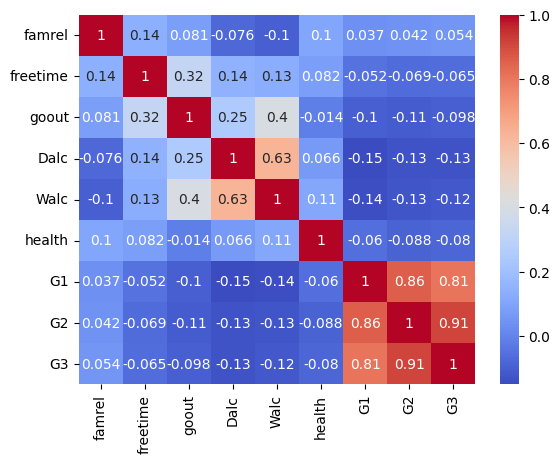

In [54]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [59]:
fig = go.Figure()
x='romantic'

fig.add_trace(go.Violin(y=df_student['G3'][ df_student[x] == 'no'],
                        name='no',
                        #side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(y=df_student['G3'][ df_student[x] == 'yes'],
                        name='yes',
                        #side='positive',
                        line_color='red')
             )

fig.update_traces(box_visible=True)
fig.update_layout(title="Influence of romantic relationship on grades",
        yaxis_title="G3",
        violinmode='overlay')

fig.show()

In [65]:
fig = go.Figure()
var='romantic'

fig.add_trace(go.Violin(x=df_student['Subject'] [df_student[var] == 'no'],
                        y=df_student['G3'][ df_student[var] == 'no'],
                        name='no',
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df_student['Subject'] [df_student[var] == 'yes'],
                        y=df_student['G3'][ df_student[var] == 'yes'],
                        name='yes',
                        side='positive',
                        line_color='red')
             )

fig.update_traces(box_visible=True)
fig.update_layout(title="Influence of romantic relationship on grades",
                  xaxis_title='Subject (0:Por, 1:Math)',
                  yaxis_title="G3",
                  violinmode='overlay')

fig.show()

In [63]:
df_student.groupby(['Subject','romantic'])['G3'].agg(['mean','median'])

mean  median
Subject romantic                   
0       no        12.129268    12.0
        yes       11.523013    12.0
1       no        10.836502    11.0
        yes        9.575758    11.0

In [72]:
def violin_plot_rom(numX, grade):
  fig = go.Figure()
  var='romantic'

  fig.add_trace(go.Violin(x=df_student[numX] [df_student[var] == 'no'],
                        y=df_student[grade][ df_student[var] == 'no'],
                        name='no',
                        side='negative',
                        line_color='blue')
                )
  fig.add_trace(go.Violin(x=df_student[numX] [df_student[var] == 'yes'],
                        y=df_student[grade][ df_student[var] == 'yes'],
                        name='yes',
                        side='positive',
                        line_color='red')
                )

  fig.update_traces(box_visible=True)
  fig.update_layout(xaxis_title=numX,
                  yaxis_title=grade,
                  violinmode='overlay',
                  title="Impact of {} and romantic relationship on {}".format(numX, grade))

  fig.show()

In [73]:
for col in features_num.columns:
  violin_plot_rom(col,'G3')

####Impact of alcohol consumption on grade

In [78]:
fig = px.scatter(df_student, y="G3", x="Dalc", color="romantic", width=400, height=500)
fig.show()

In [81]:
fig = px.scatter(df_student, y="G3", x="Dalc", facet_col="romantic", width=800, height=500)
fig.show()

In [83]:
fig = px.scatter(df_student, y="G3", x="Walc", color="romantic", width=400, height=500)
fig.show()

In [84]:
fig = px.scatter(df_student, y="G3", x="Walc", facet_col="romantic", width=800, height=500)
fig.show()

#####Health and alcohol consumption

In [107]:
df_hAlc=df_student.groupby(['health','Dalc']).size().reset_index(name='count')
print(df_hAlc)

    health  Dalc  count
0        1     1     99
1        1     2     24
2        1     3      7
3        1     4      3
4        1     5      4
5        2     1     87
6        2     2     25
7        2     3     10
8        2     4      1
9        3     1    167
10       3     2     26
11       3     3      9
12       3     4      8
13       3     5      5
14       4     1    123
15       4     2     34
16       4     3      3
17       4     4      5
18       4     5      9
19       5     1    251
20       5     2     87
21       5     3     40
22       5     4      9
23       5     5      8


In [110]:
fig = px.scatter_3d(df_hAlc,x='health',y='Dalc',z='count')
fig.show()

In [111]:
df_hAlc[['health','count']][df_hAlc['Dalc']==2]

,health,count
1,1,24
6,2,25
10,3,26
15,4,34
20,5,87


In [112]:
def hAlc_plot(alc_val):
  dfsub=df_hAlc[['health','count']][df_hAlc['Dalc']==alc_val]
  fig = px.scatter(dfsub,x='health',y='count', title='Dalc = {}'.format(alc_val))
  fig.show()

In [114]:
for i in df_hAlc['Dalc']:
  hAlc_plot(i)

###Inferences:
1. As expected, the grades are positively correlated with the quality of family relationships, but negatively correlated with alcohol consumption. However, the former positive correlation is weak.
2. The grades are negatively correlated with student's free time after school and the frequency they go out with friends after school. Here, "freetime" and "goout" need clarifications. If "free time" and "goout" means the time that the student spends on non-academic activities, then of course these factors will negatively impact student's grades. However, in general, students can also do productive activities during their free time after school and with friends, e.g, sports, studying together, band practice etc.
3. At first, I am surprised that the grades are negatively correlated with student's health, albeit weakly. However, I notice that health is (ironically) also positively correlated with the student's alcohol consumption and "freetime", so the negative impact on grades may be related to the student's alcohol consumption.
4. In general, students who are not in romantic relationships perform better than students who are in romantic relationships. This effect is more noticeable in mathematics than in portuguese.  